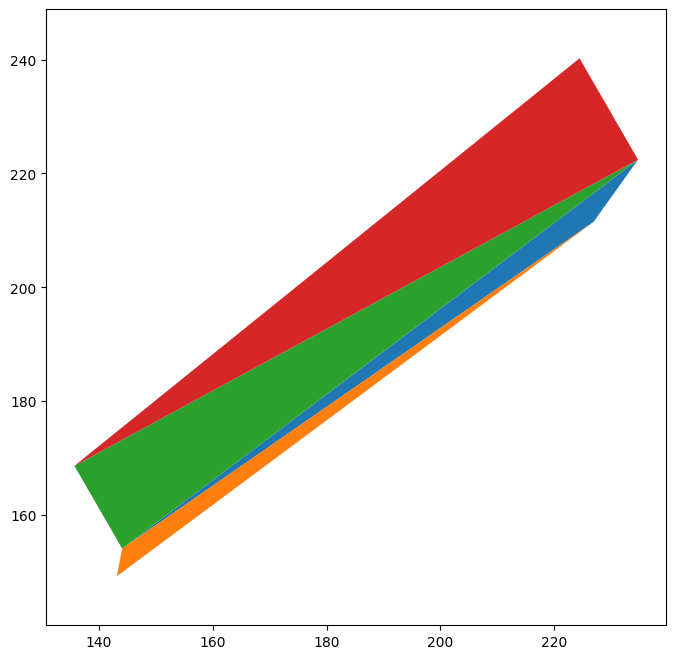

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.transform import Rotation as R

def raster(tris):
    list = np.array_split(tris, int(np.shape(tris)[0]/3) , axis=0)
    plt.figure(figsize=(8, 8), dpi=100)
    plt.axis('equal')
    for tri in list:
        x = tri[:,0]
        y = tri[:,1]
        plt.fill(x, y)
    # plt.ylim([0, 800])
    # plt.xlim([0, 800])
    plt.show()

class Model:
    vertices: np.ndarray  
    position: np.ndarray  
    scale: np.ndarray  
    rotation: np.ndarray  

    def __init__(self, verts, pos, scale, rot):
        self.vertices = verts
        self.position = pos
        self.scale = scale
        self.rotation = rot

model_vertices = np.array([[-1,0,0],[-1,0,1],[1,0,0], [1,0,0],[-1,0,1],[1,0 ,1], [-1,0,0],[1,1,0],[1,0,0], [-1,0,0],[1,1,0],[-1, 1,0]])
model_pos = np.array([0.5, 0.5, 0.5])
model_scale = np.array([2,1,1])
model_rotation = np.array([45,0,0])
model = Model(model_vertices, model_pos, model_scale, model_rotation)

def euler_to_matrix(angles):
    x = math.radians(angles[0])
    y = math.radians(angles[1])
    z = math.radians(angles[2])

    Rx = np.array([[1, 0, 0, 0],
                   [0, np.cos(x), np.sin(x), 0],
                   [0, -np.sin(x), np.cos(x), 0],
                   [0, 0, 0, 1]])

    Ry = np.array([[np.cos(y), 0, -np.sin(y), 0],
                   [0, 1, 0, 0],
                   [np.sin(y), 0, np.cos(y), 0],
                   [0, 0, 0, 1]])

    Rz = np.array([[np.cos(z), -np.sin(z), 0, 0],
                   [np.sin(z), np.cos(z), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    R = np.dot(Rz, np.dot(Rx, Ry))

    return R

scale_matrix = np.diag([model.scale[0], model.scale[1], model.scale[2], 1])
translation_matrix = np.array([[1, 0, 0, model.position[0]],
                               [0, 1, 0, model.position[1]],
                               [0, 0, 1, model.position[2]],
                               [0, 0, 0, 1]])
rotation_matrix = euler_to_matrix(model.rotation)

world_model = []

for vertex in model.vertices:
    vertex = np.append(vertex, 1)
    vertex = scale_matrix @ vertex
    vertex = rotation_matrix @ vertex
    vertex = translation_matrix @ vertex
    world_model.append(vertex[:3])

world_model = np.array(world_model)


camera_pos = np.array((10,10,10))

forward_vector = camera_pos - model_pos
distance = math.sqrt((forward_vector[0])**2 + (forward_vector[1])**2 + (forward_vector[2])**2)
forward_vector = -camera_pos / distance


world_up = np.array((0,1,0))
right_vector = np.cross(world_up, forward_vector)
right_vector /= np.linalg.norm(right_vector)


up_vector = np.cross(forward_vector, right_vector)
up_vector /= np.linalg.norm(up_vector)  

transformation_matrix = np.array((right_vector, up_vector, -forward_vector))


transform_matrix = np.transpose(transformation_matrix)
transform_matrix_inverse = np.linalg.inv(transform_matrix)

model.vertices = world_model


camera_model = []
for vertex in model.vertices:
    transform_vertex = transform_matrix_inverse @ np.transpose(vertex)
    camera_model.append(transform_vertex+10)
camera_model = np.array(camera_model)



d = 1
screen_size = np.array([800, 800]) 
view_screen_size = np.array([4, 4])  

screen_model = []
for point in camera_model:
    point = point * d / point[2]  
    point = point[:2] / view_screen_size * screen_size 
    screen_model.append(point)
screen_model = np.array(screen_model)


raster(screen_model)